<a href="https://colab.research.google.com/github/Sanketkamble01/YES-BANK-Stock-closing-price-prediction/blob/main/YES_BANK_Stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **$\color{blue}{\text{Yes Bank Stock Closing Price Prediction}}$**



##### **Project Type**    -  Regression
##### **Contribution**    -  Individual
##### **Team Member 1**-  $\color{red}{\text{Sanket Kamble}}$

# **Project Summary -**

Yes Bank is a recognized bank in India's financial sector. Yes bank refers to Youthenterprise Scheme Bank. This bank listed in share market. . The aim of this project is to construct a predictive model for close price prediction. The main point of the stock market is that people try to buy shares in a lower price and sell them when the price goes up, thereby making a profit. Any stock's price may vary depending on a number of variables. Events like the bank management personnel fraud case undoubtedly have a significant impact on stock prices.

Thus we are looking on such one case of Rana Kapoor yes bank fraud case. In order to forecast how other relevant features will affect the stock closing price of the bank.

I have been given a dataset of Yes Bank stock prices. Several machine learning models have been applied to make a prediction.

**Preprocessing the data** :-

1.Get the dataset

2.Import important libraries for analysis

3.Mount Google drive and read csv files

4.see all data information.

5.Check the Null values

6.Check the duplicate values

7.Make the size column in one format

8.Remove the special characters

9.Change the data type where necessary


**Exploratory data analysis(EDA) :-**

Apply variour EDA techinques and get insides among them

**Supervise Machine learning algorithms and implementation :**

1) Linear Regression

2) Lasso Regression

3) Ridge Regression

4) Elastic Net regression

5) GradientBoosting regression

6) XGBoost regression


# **GitHub Link -**

https://github.com/Sanketkamble01/YES-BANK-Stock-closing-price-prediction

# **Problem Statement**


>**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

#Removing Warnings.
import warnings
warnings.filterwarnings('ignore')

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor


#libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

### Dataset Loading

In [2]:
# Load Dataset
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# read CSV files
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/data_YesBank_StockPrices.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

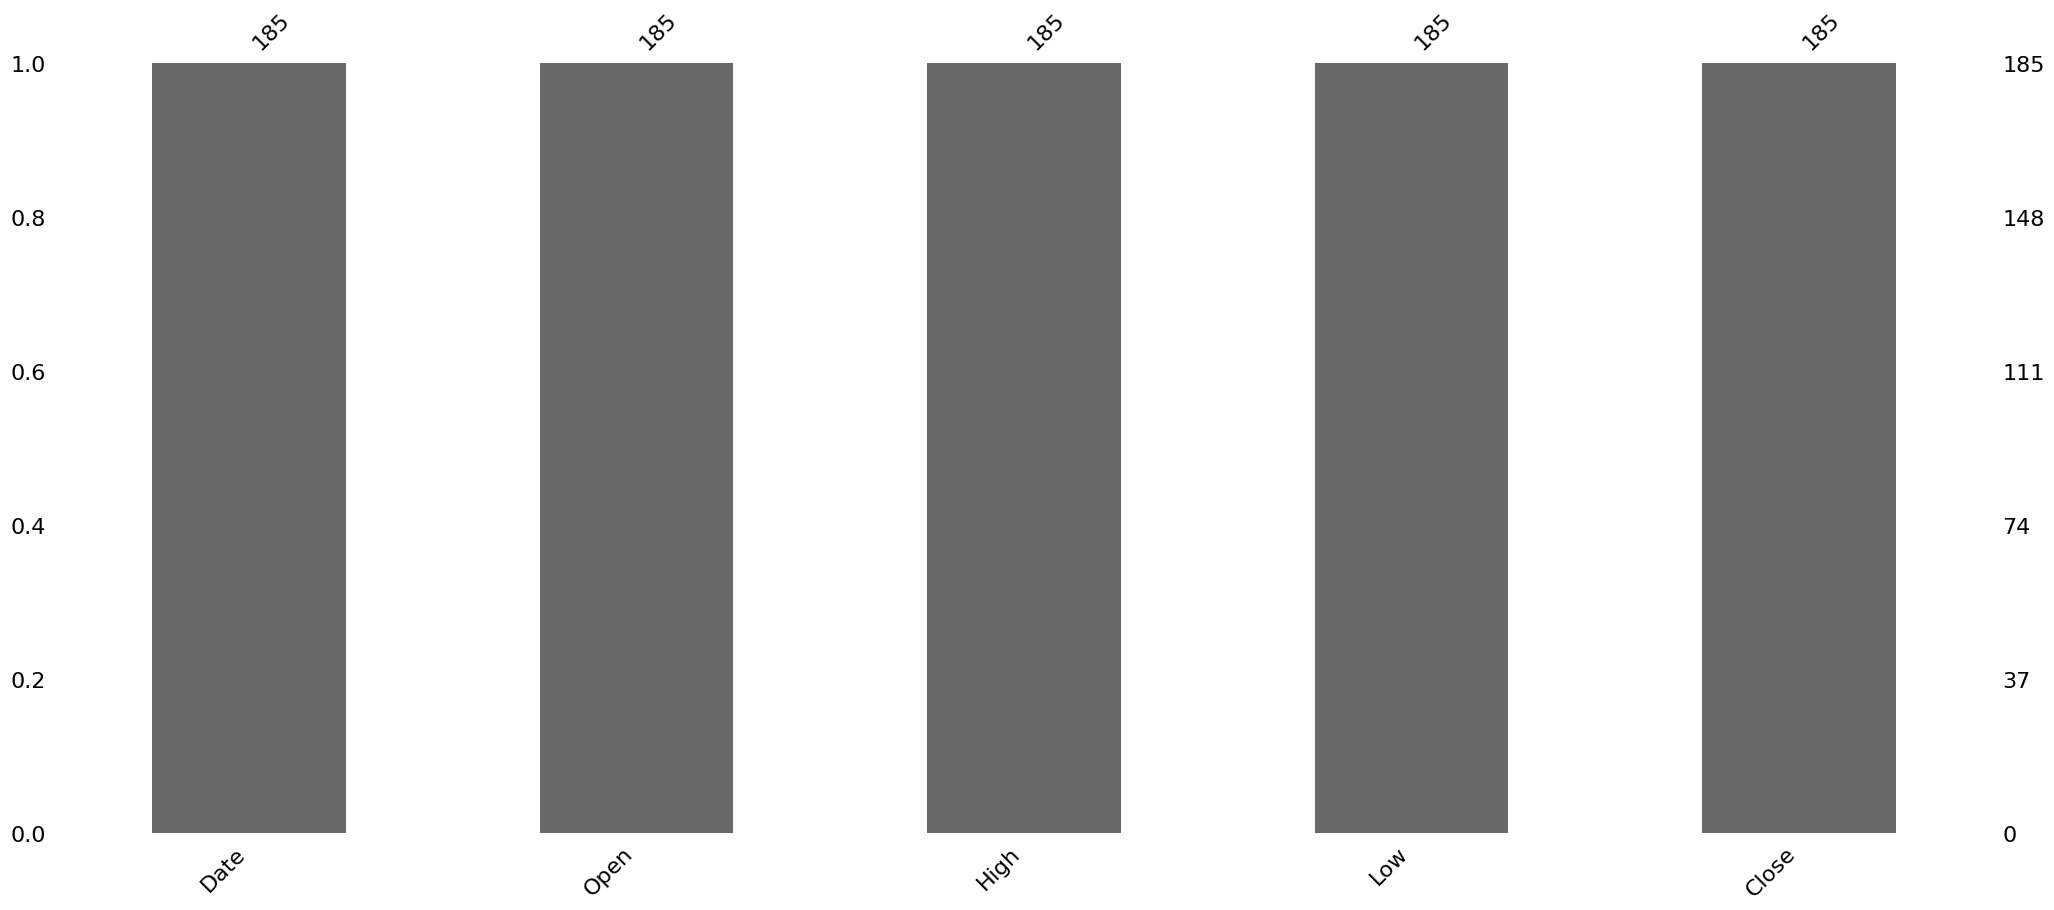

In [8]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?


> The Dataset has Opening, Highest, Lowest and the Closing Prices of the Stock in every month.
>
>There is no missing and duplicate value in our data.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

We have the yes bank Stock Price dataset. It has the following characteristics:

**Date** : Date of record

**Open** : Opening Price

**High** : Highest price in the day

**Low** : Lowest price in the day

**Close** : Occupations of the speaker

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique value in",i,"is :",df[i].nunique())

Number of unique value in Date is : 185
Number of unique value in Open is : 183
Number of unique value in High is : 184
Number of unique value in Low is : 183
Number of unique value in Close is : 185


## ***3. Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Here data cleaning is not required because absence of Duplicate and Null values.
# The data is ready for analysis because it is already in data frame form. 

# The 'date' columns is as object type,we have to convert it to 'datetime' for better analysis.
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [13]:
# Split data into Independent and Dependent Variables
x = df[['Open', 'High', 'Low']]
y = df['Close']

### What all manipulations have you done and insights you found?

◼ change data type of column date from object to datetime

◼ It help us in better analysis

◼ The data dosen't have any Null value

◼ The data dosen't have any duplicate value

◼ Divided the data into dependent and independent variables to prepare it for the ML model.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  close price vs date

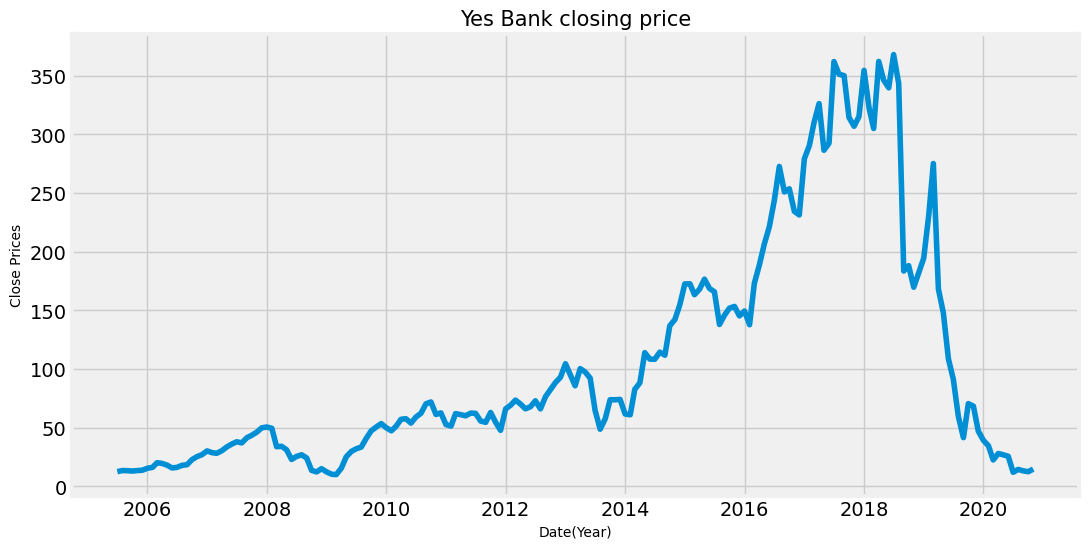

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(13,6))
plt.style.use('fivethirtyeight')
plt.xlabel('Date(Year)', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.plot(df['Date'], df['Close'])
plt.grid(True)
plt.title('Yes Bank closing price', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

> Line plots are the greatest choice since they are simple to grasp and allow me to examine continuous data over a lengthy period of time.
>
>Line graphs can be used to compare changes for multiple groups over the same time period.

##### 2. What is/are the insight(s) found from the chart?

> As we can see in this graph, the Share prices increase from 2014 to 2018 and then fell sharply.
>
>It increases again in 2019, but fell again.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 2 distribution plot of Close price

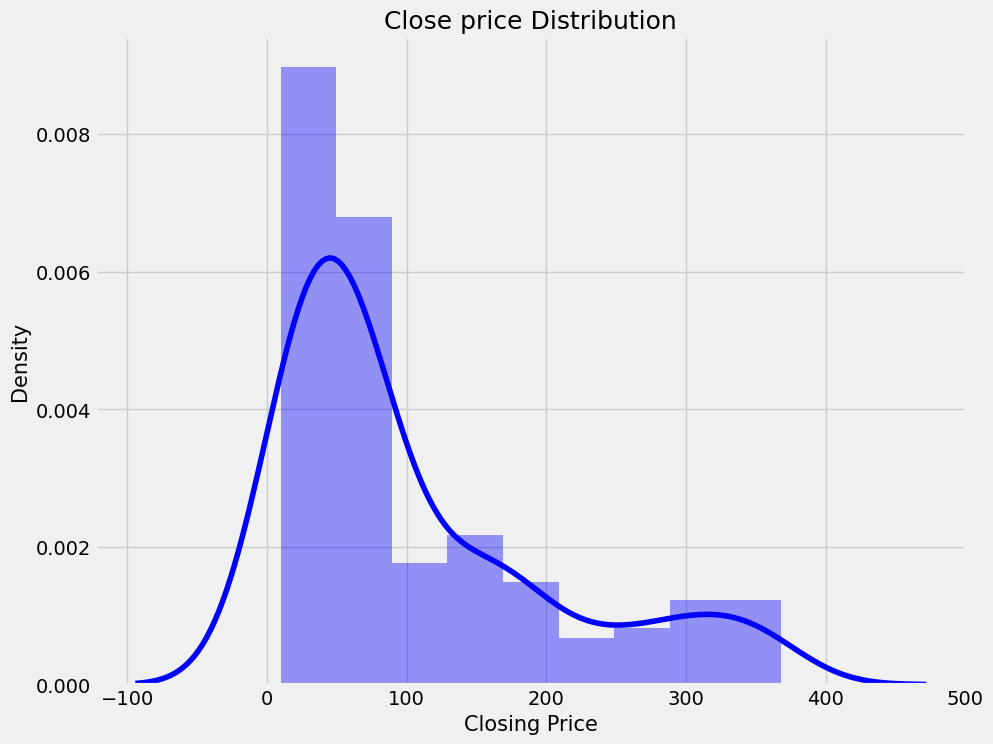

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
sns.distplot(df['Close'],color="blue")
plt.title('Close price Distribution', fontsize=18)
plt.xlabel('Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

>The best technique to examine any variable's distribution, particularly a continuous variable, is via a distplot.The seaborn.distplot() function returns a plot with the density distribution and takes a data variable as an argument.so i used it.

##### 2. What is/are the insight(s) found from the chart?

> Data of closing price distribution plot is Right skewed.
>
>apply log transformation to make uniform  distribution.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help to gain insight

#### Chart - 3 Numerical features distribution i.e Open, Low and high price of share

Text(0.5, 1.0, 'Lowest price of day distribution')

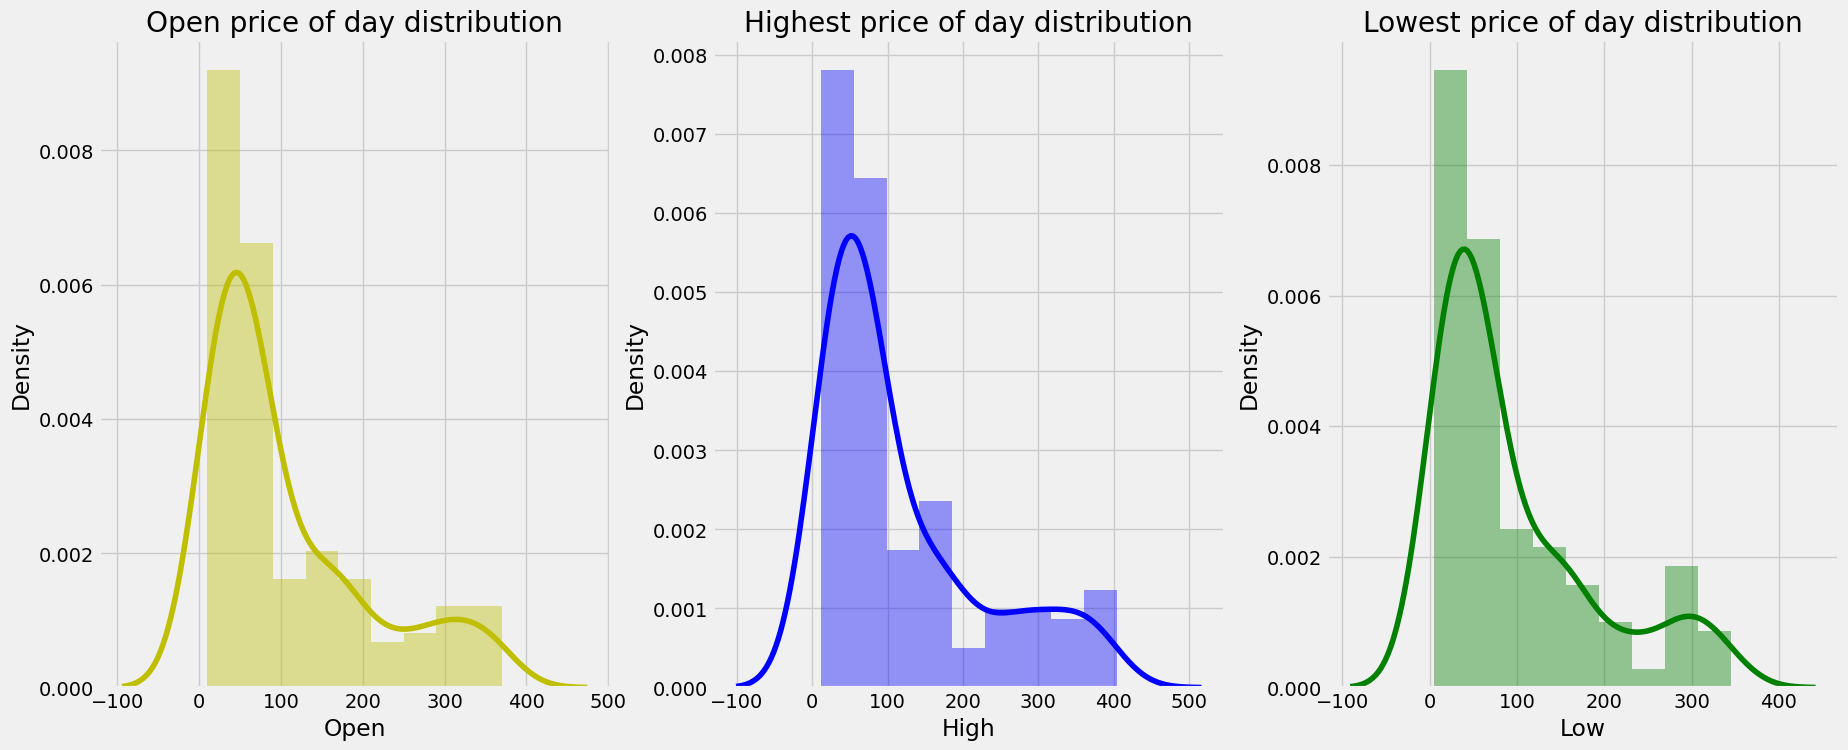

In [16]:
# Chart - 3 visualization code
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.distplot(df['Open'], color = 'y')
plt.title('Open price of day distribution')

plt.subplot(1,3,2)
sns.distplot(df['High'] , color = 'blue')
plt.title('Highest price of day distribution')

plt.subplot(1,3,3)
sns.distplot(df['Low'] , color = 'green')
plt.title('Lowest price of day distribution')

##### 1. Why did you pick the specific chart?

> I used a distplot inside of a subplot to check the distribution of the various variables in this instance. Subplots are useful for viewing several graphs or distributions at once.The distplot is plotted using the distplot() function.

##### 2. What is/are the insight(s) found from the chart?

>    All the above distribution is right skewed
>
> To make them normally distributed apply log transformation

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 4 see the relationship between target dependent (closing price) and independent variables

Text(0.5, 1.0, 'Low vs Close')

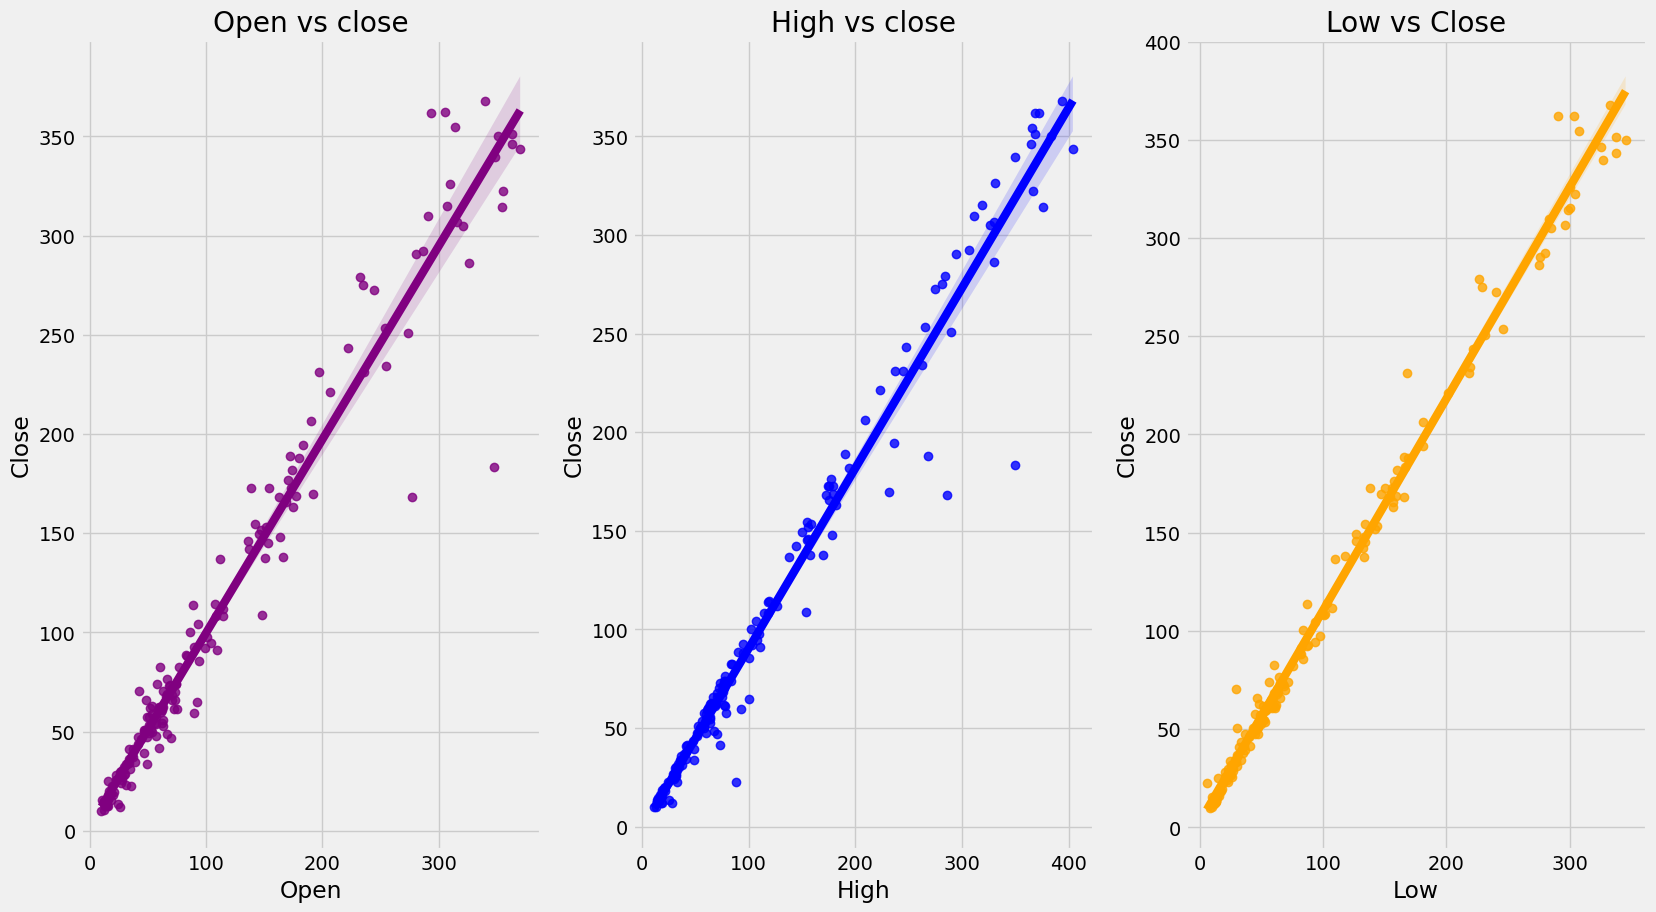

In [17]:
# Chart - 4 visualization code
plt.figure(figsize = (18,10))
#creating different subplot again. 

plt.subplot(1,3,1)
sns.regplot(x='Open' , y='Close',data = df ,scatter_kws={"color": "purple"}, line_kws={"color": "purple"})
plt.title('Open vs close')

plt.subplot(1,3,2)
sns.regplot(x='High' , y='Close', data = df ,scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
plt.title('High vs close')


plt.subplot(1,3,3)
sns.regplot(x='Low' , y='Close',data = df ,scatter_kws={"color": "orange"}, line_kws={"color": "orange"})
plt.title('Low vs Close')

##### 1. Why did you pick the specific chart?

>.Regression line construction is better than regplot for observing how variables interact with one another. To display them all at once, I utilised them inside a subplot..

##### 2. What is/are the insight(s) found from the chart?

> All regression lines show a relationship, it appears that all independent variables are directly proportional to the target.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 5 box plot.

<Axes: title={'center': 'Box plot'}>

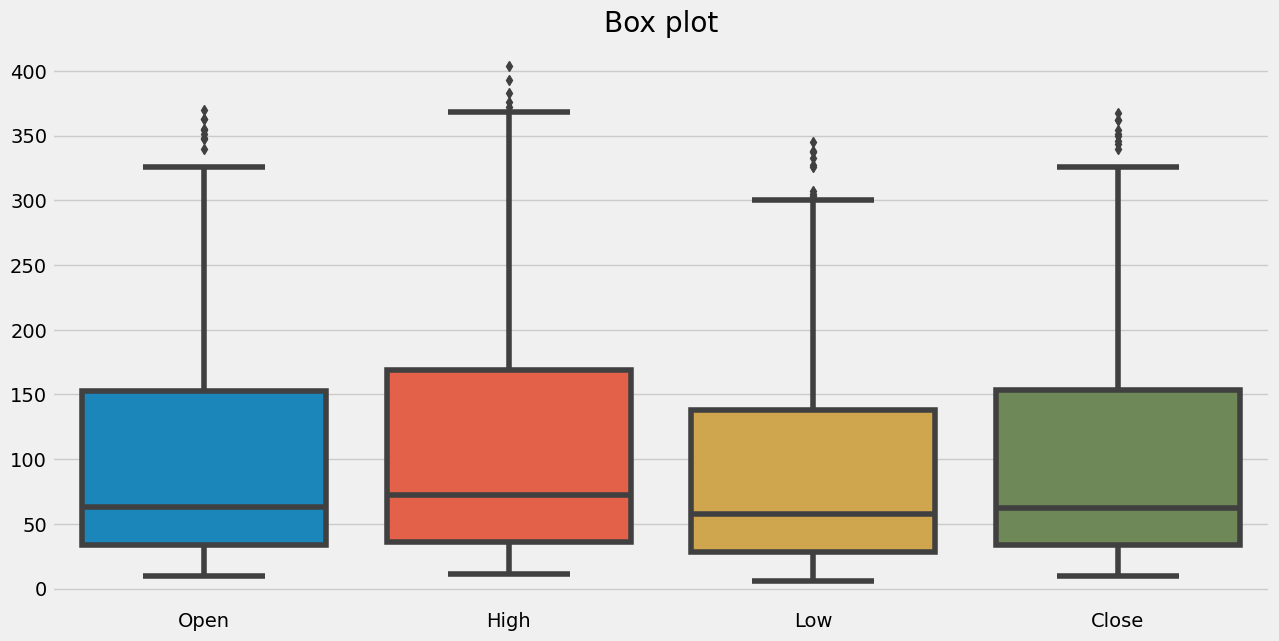

In [18]:
# Chart - 5 visualization code
plt.figure(figsize = (14,7))
plt.title('Box plot')
sns.boxplot(data = df)

##### 1. Why did you pick the specific chart?

> Box plots are used to display the distributions of numerical data values, particularly when comparing them across various groups.The 5-number summary of the data is displayed using the box plot. They are designed to give high-level information at a glance and provide details

##### 2. What is/are the insight(s) found from the chart?

> There are a few outliers. Every feature is extremely corelated with each other.
  The median are close to each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 6 - Correlation Heatmap

<Axes: >

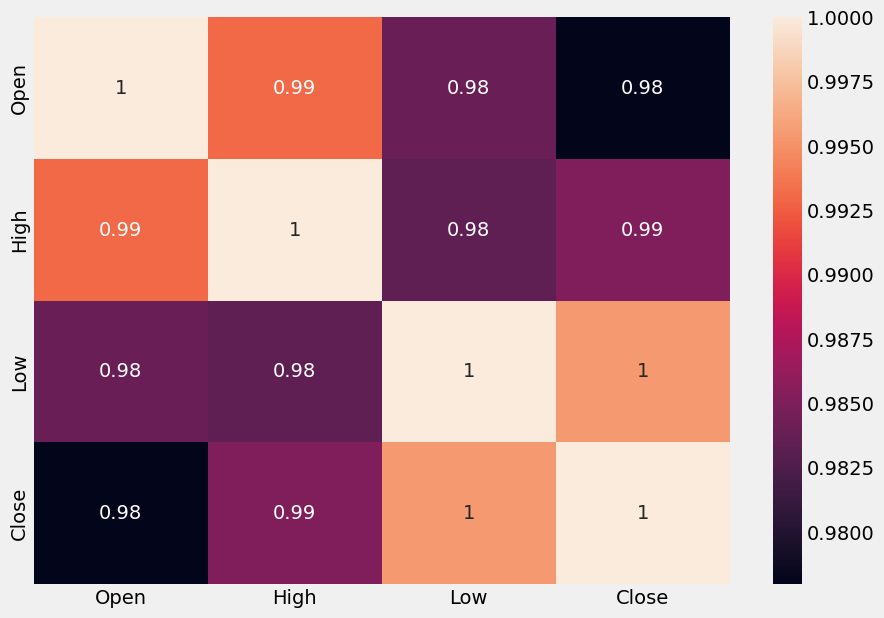

In [19]:
# Correlation Heatmap visualization code
plt.figure(figsize = (10,7))
plt.style.use("fivethirtyeight")
sns.heatmap(df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

> Heatmaps are useful for examining correlation.With one variable drawn on each axis, heatmaps are used to display relationships between two variables, therefore I utilised them.


##### 2. What is/are the insight(s) found from the chart?

> This has a strong correlation.

#### Chart - 7 - Pair Plot 

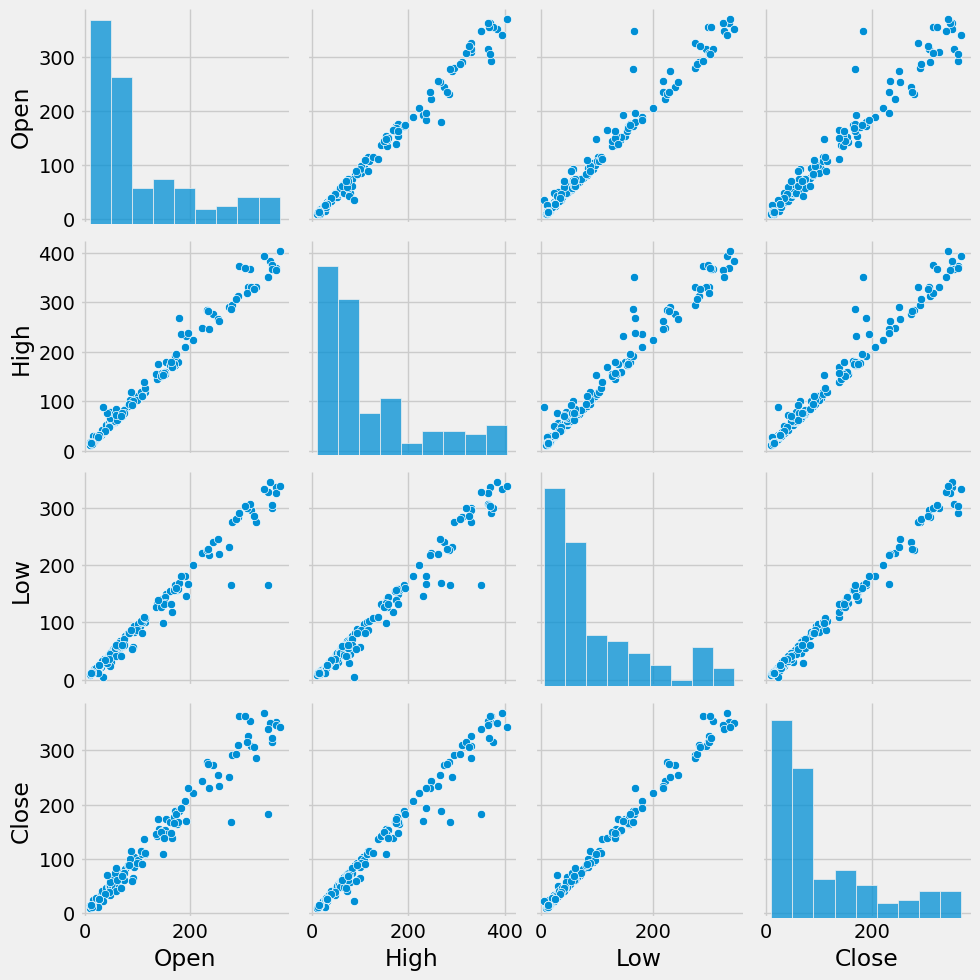

In [20]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

> The pair chart helps us understand how the various pairs of variables vary with one another and how they are distributed.

##### 2. What is/are the insight(s) found from the chart?

> The variables are dependent to each other
>
> They change on a linear basis.




## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [21]:
# Handling Missing Values & Missing Value Imputation
#No missing value present in data

#### What all missing value imputation techniques have you used and why did you use those techniques?

Not applicable because no missing value present in data

### 2. Handling Outliers

In [22]:
# Handling Outliers & Outlier treatments
#we can not use any outlier handling methord or we are not delete them because Here, we are thinking the outlier is due to the stock market's natural cause
#we will execute different ML algorithms and only treat outliers if the models score lower.

##### What all outlier treatment techniques have you used and why did you use those techniques?

NA

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [23]:
# Manipulate Features to minimize feature correlation and create new features

Determine the variation inflation factor (VIF), To see the relationship between independent variables

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [25]:
calculate_vif(df[[i for i in df.describe().columns if i not in ["Date", "Close"]]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


> The VIF is very high. We are not removing any features from the dataset while we attempt to predict the outcome, assess the model's performance, and make adjustments as necessary.

### 4. Data Transformation

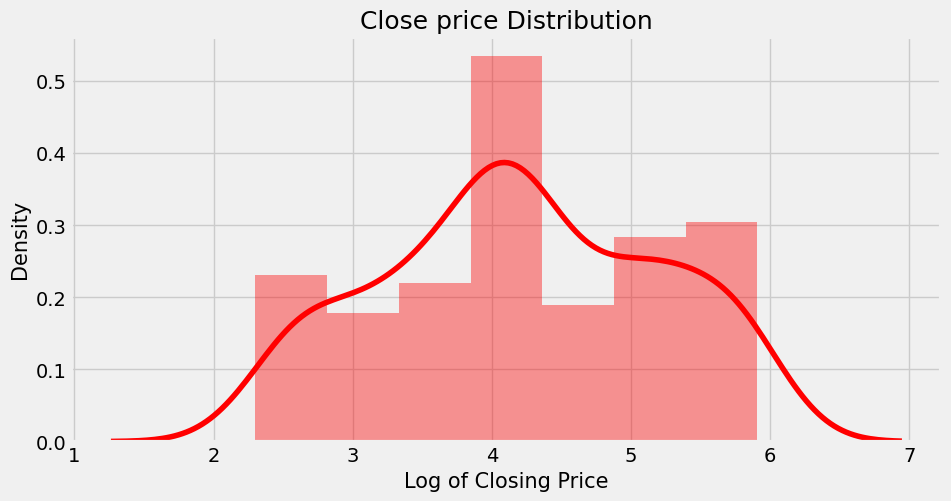

In [26]:
#Applying log transformation to Close price distribution plot
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['Close']),color='red')
plt.title('Close price Distribution', fontsize=18)
plt.xlabel('Log of Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Lowest price of day distribution')

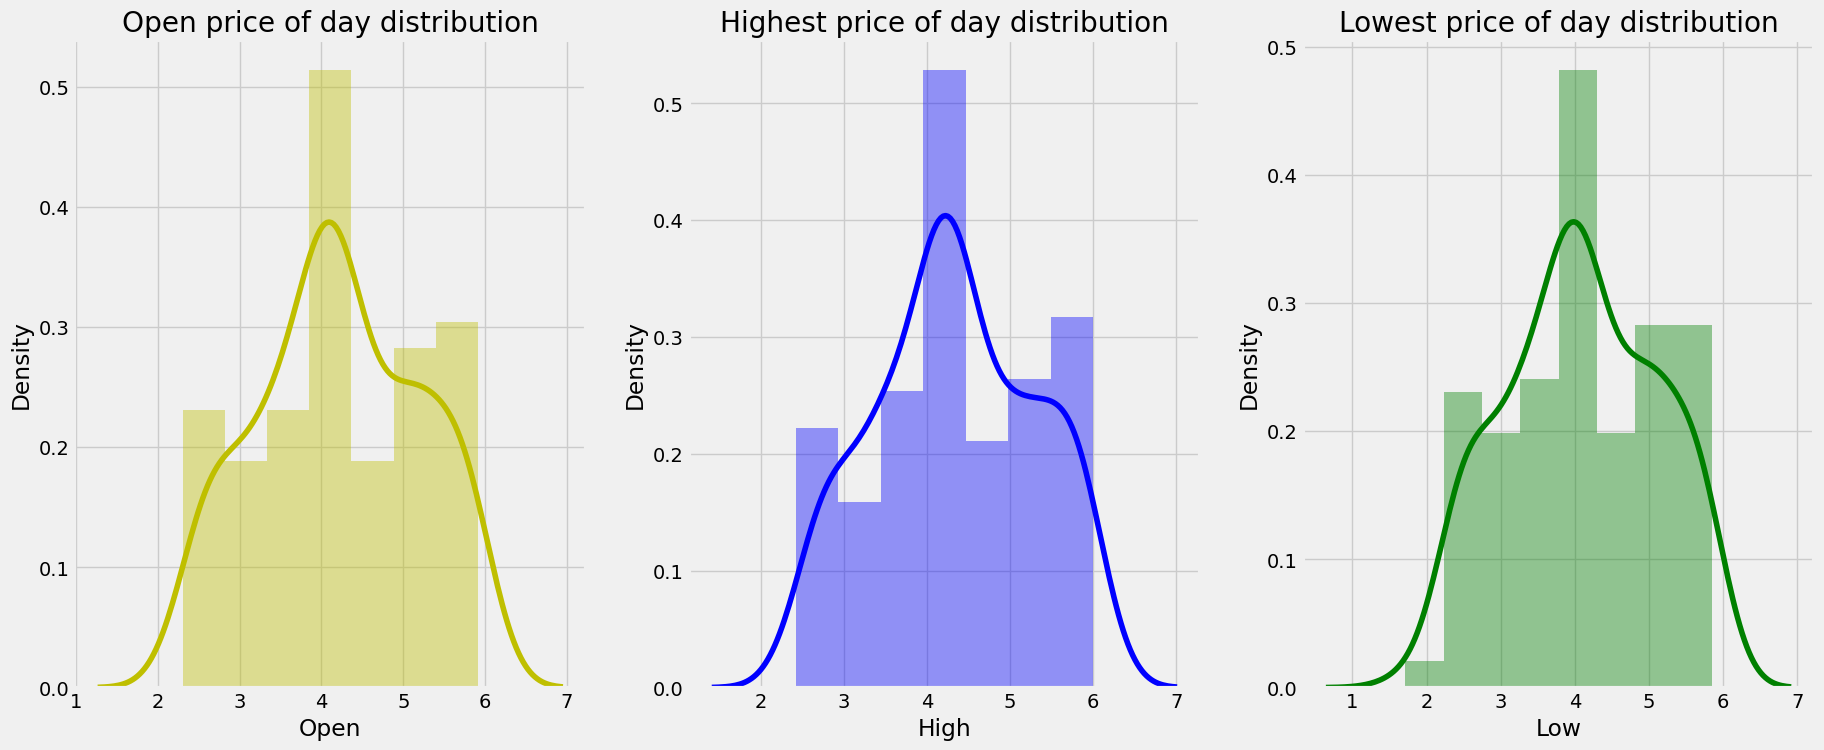

In [27]:
#Plot the distribution for Open,High and low.
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.distplot(np.log(df['Open']), color = 'y')
plt.title('Open price of day distribution')

plt.subplot(1,3,2)
sns.distplot(np.log(df['High']) , color = 'blue')
plt.title('Highest price of day distribution')

plt.subplot(1,3,3)
sns.distplot(np.log(df['Low']) , color = 'green')
plt.title('Lowest price of day distribution')

In [28]:
# Data Tranformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

> As was already mentioned in the visualisation part, the various data features were skewed in this data frame. To make it more normal, I used log transformation.

### 5. Data Splitting

In [29]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.20 , random_state = 1) 

##### What data splitting ratio have you used and why? 

Data splitting ratio is 80,20 .This is a most common ratio.

## ***6. ML Model Implementation***

### ML Model - ***1.   Linear Regression***

In [30]:
# ML Model - 1 Implementation
l_reg = LinearRegression()

# Fit the Algorithm
l_reg.fit(x_train,y_train)

# Predict on the model
Prediction=l_reg.predict(x_test)
Prediction

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [31]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [32]:
#test score
l_reg.score(x_test , y_test)

0.8225699915389754

In [33]:
#Making a Df for testing Dataset
test_Dataframe = pd.DataFrame(y_test)
test_Dataframe.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [34]:
test_Dataframe['Predicted Closing Price']= Prediction
test_Dataframe.head()
     

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


**Actual Price vs Prediction price for Linear Regression plot**

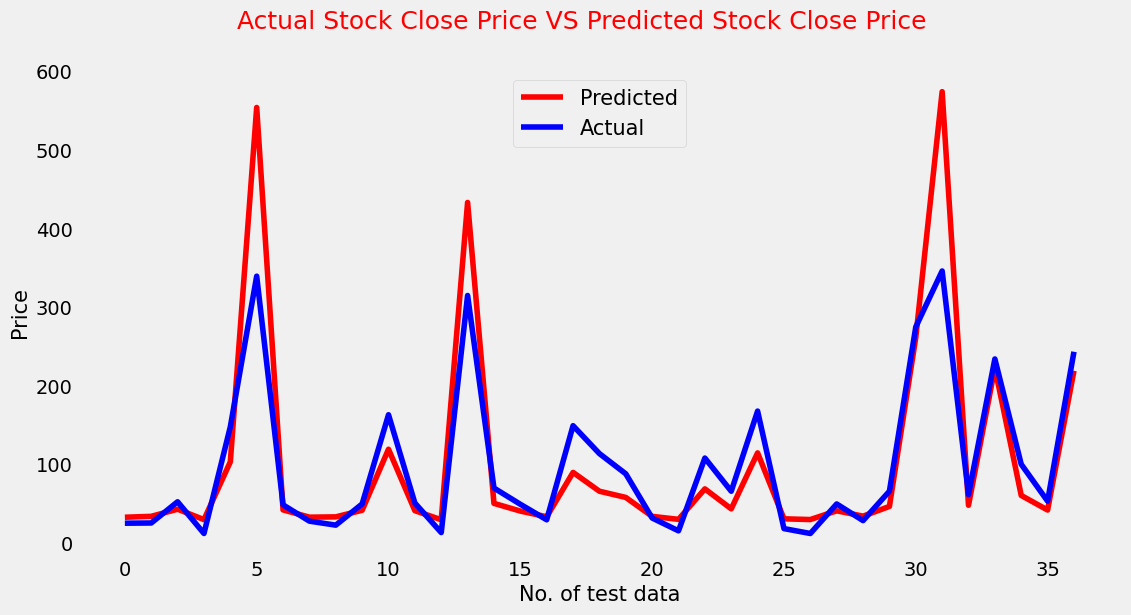

In [35]:
plt.figure(figsize=(12,6))
plt.plot(10**(Prediction),color="red")             
plt.plot(10**(np.array(y_test)),color="blue")           
plt.xlabel("No. of test data",fontsize= 15)
plt.ylabel("Price",fontsize= 15)
plt.suptitle("Actual Stock Close Price VS Predicted Stock Close Price",fontsize=18,color="red")
plt.legend(["Predicted","Actual"],fontsize= 15)
plt.grid()
plt.style.use("dark_background")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> A variable's value can be predicted using linear regression analysis based on the value of another variable. The dependent variable is the one you're trying to predict. The differences between predicted and real output values are minimized by linear regression by fitting a straight line or surface.
 Evaluation metric Score Chart:  


In [36]:
# Visualizing evaluation Metric Score chart
print("MSE :",round(mean_squared_error(y_test, Prediction), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test,Prediction)),3))
print("MAE :",round(mean_absolute_error(y_test,Prediction),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, Prediction),3))
print("R2 :",round(r2_score(y_test,Prediction), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


### ML Model - **2. Lasso Regression**

In [37]:
# ML Model - 2 Implementation
lso_r = Lasso(alpha=0.005, max_iter = 3000)

# Fit the Algorithm
lso_r.fit(x_train, y_train) 

# Predict on the model
ypre2 = lso_r.predict(x_test)
ypre2

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [38]:
#test score
lso_r.score(x_test , y_test)

0.8199714923878543

In [39]:
#compare the Actual and Predicted values.
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)


In [40]:
test_df['Predicted closing price In Lasso'] =ypre2

test_df.head()

,Close,Predicted closing price In Lasso
16,1.403464,1.520555
179,1.408240,1.535773
66,1.720903,1.640738
40,1.088490,1.480070
166,2.170115,2.014612


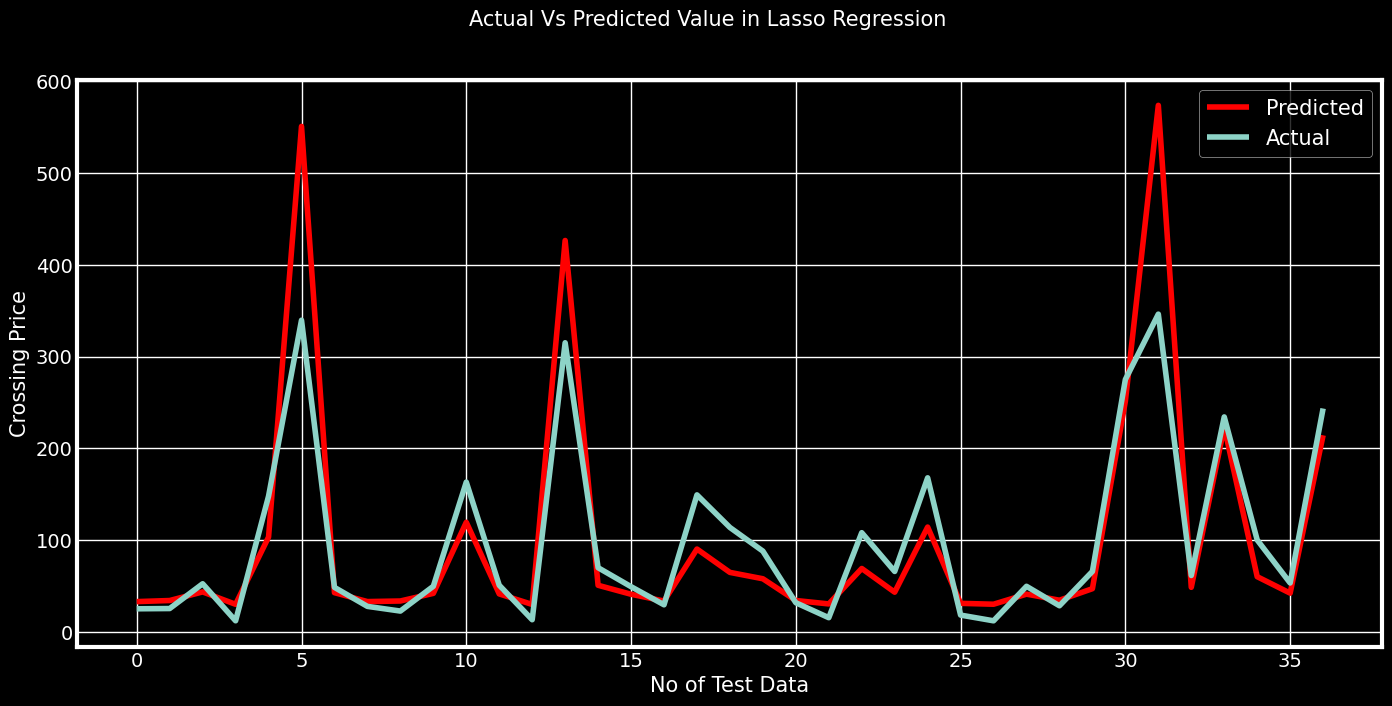

In [41]:
plt.figure(figsize=(15,7))
plt.plot(10**(ypre2),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)
plt.style.use("dark_background")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> Lasso regression is a linear regression, but it uses a "shrinkage" technique where the coefficients of determination shrink to towards zero.
>
>Lasso (least absolute shrinkage and selection operator) is regression analysis method that variable selection and regularization performs both in order to enhance the prediction accuracy and interpretability of the resulting statistical model. This method performs L1 regularization.

In [42]:
# Visualizing evaluation Metric Score chart
print("MSE score:", round(mean_squared_error (y_test, ypre2), 3))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, ypre2)), 3))
print("MAE score:", round(mean_absolute_error(y_test, ypre2), 3))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, ypre2), 3))
print("R2 score:", round(r2_score(y_test,ypre2), 3))

MSE score: 0.032
RMSE score: 0.179
MAE score: 0.152
MAPE score: 0.096
R2 score: 0.82


#### 2. Cross- Validation & Hyperparameter Tuning

In [43]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

# Fit the Algorithm
lasso_model_cv.fit(x_train,y_train)

# Predict on the model
y_pred_lasso_cv = lasso_model_cv.predict(x_test)
y_pred_lasso_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [44]:
print(" Best fit alpha value is figure out.:", round(lasso_model_cv.best_params_['alpha'], 4))
print("negative mean squared error is : ", round(lasso_model_cv. best_score_,4))

 Best fit alpha value is figure out.: 0.01
negative mean squared error is :  -0.0352


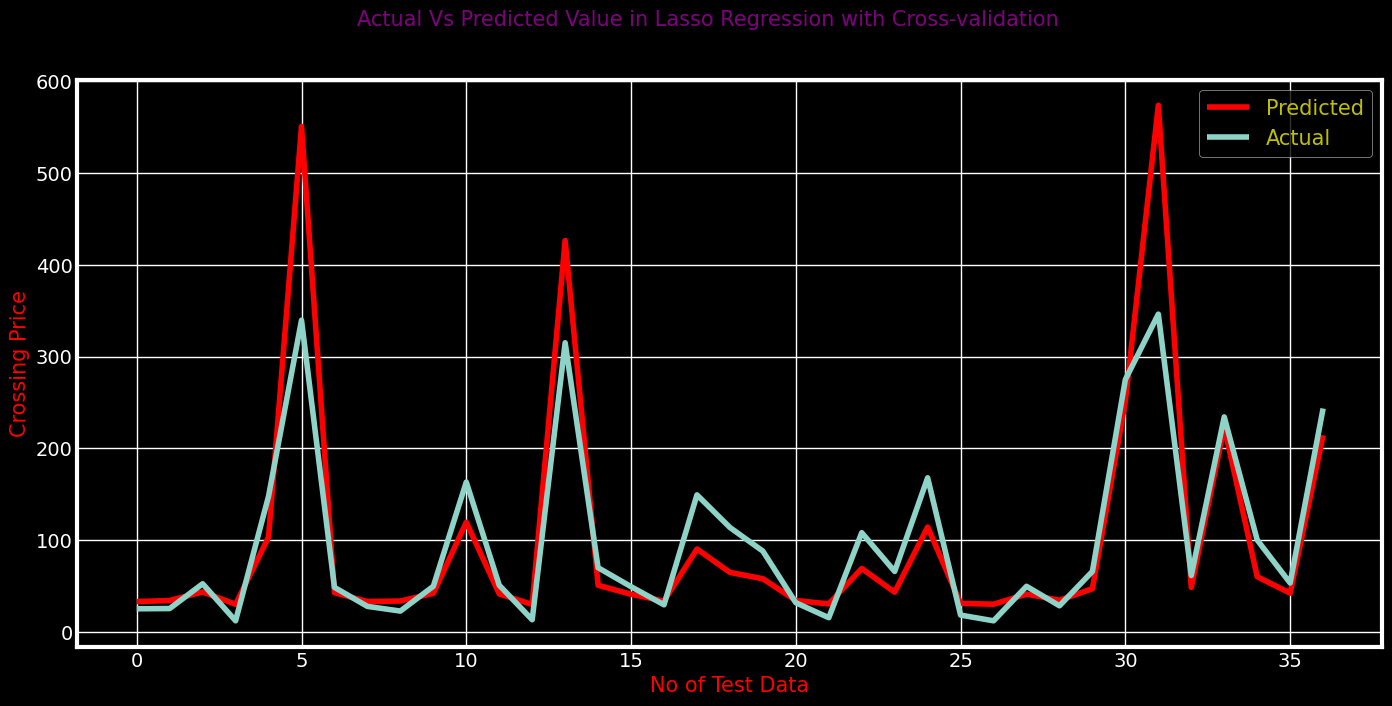

In [45]:
plt.figure(figsize=(15,7))
plt.plot(10**(ypre2),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression with Cross-validation', fontsize= 15,color='purple')
a = plt.legend(['Predicted','Actual'], fontsize = 15)
for text in a.get_texts():
  text.set_color("y")
plt.xlabel('No of Test Data', fontsize = 15,color='red')
plt.ylabel('Crossing Price', fontsize= 15,color='red')
plt.grid(True)
plt.style.use("Solarize_Light2")

##### Which hyperparameter optimization technique have you used and why?

> The only method I could think of to select the appropriate parameter in this situation was to use the grid search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [46]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test,y_pred_lasso_cv), 3))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test,y_pred_lasso_cv)), 3))
print("MAE score:", round(mean_absolute_error(y_test,y_pred_lasso_cv), 3))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv), 3))
print("R2 score:", round(r2_score(y_test,y_pred_lasso_cv), 3))

MSE score: 0.032
RMSE score: 0.18
MAE score: 0.153
MAPE score: 0.097
R2 score: 0.819


> Lasso Regression R2 score was 0.82 while after cross validation it is 0.81, thus there is no improvement.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

> R2 evaluates how well a model fits the data. The R2 coefficient of determination in regression is a statistical indicator of how closely the regression predictions match the actual data points. When the R2 value is 1, the regression's predictions accurately reflect the data.

### ML Model - **3. Ridge Regression**

In [47]:
# ML Model - 3 Implementation
ridge_reg = Ridge(alpha=0.01)

# Fit the Algorithm
ridge_reg_model = ridge_reg.fit(x_train,y_train)

# Predict on the model
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [48]:
#test score
ridge_reg.score(x_test , y_test)

0.8225231723163114

In [49]:
testdf = pd.DataFrame(y_test)
testdf['Predicted closing price In Ridge'] = y_pred_ridge

testdf.head()

,Close,Predicted closing price In Ridge
16,1.403464,1.517373
179,1.408240,1.532122
66,1.720903,1.635277
40,1.088490,1.475407
166,2.170115,2.014770


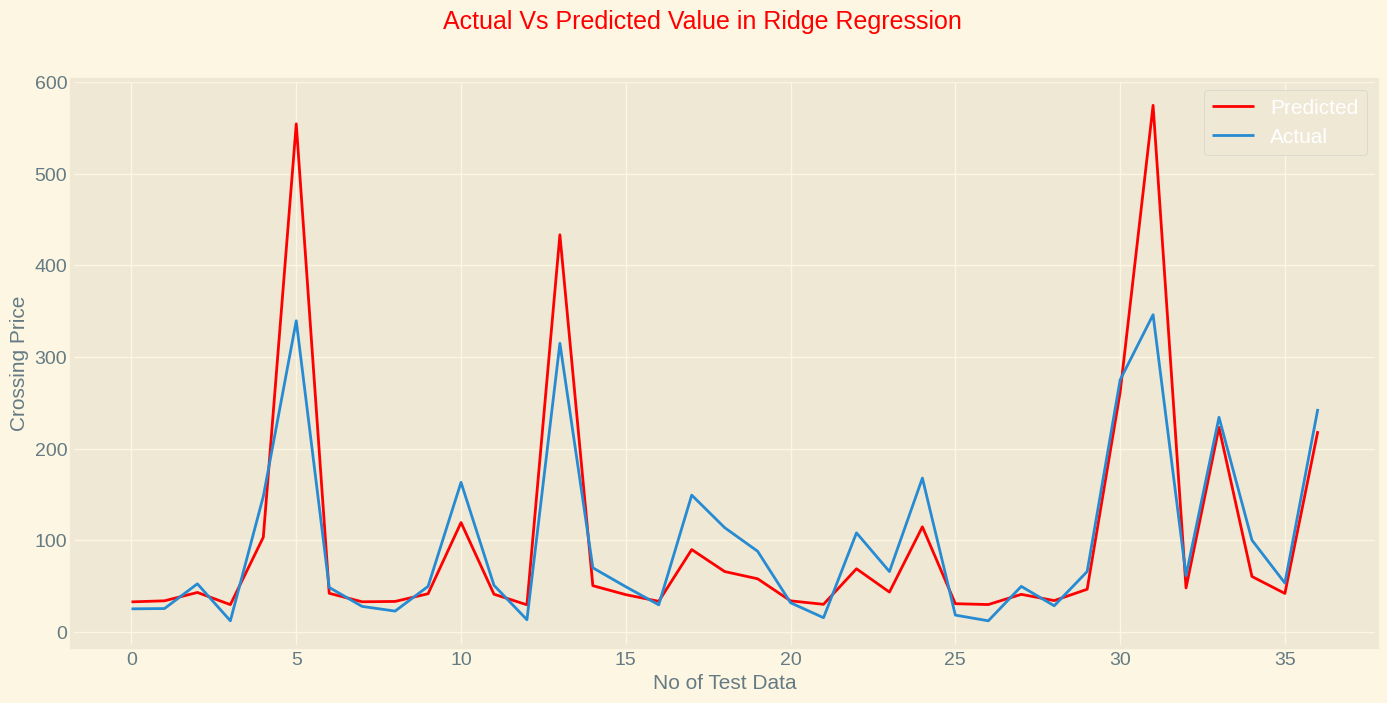

In [50]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Ridge Regression', fontsize= 18,color='red')
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.style.use("seaborn-dark")
plt.grid(True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> A regularised variation of linear least squares regression is ridge regression. It functions by reducing the weights or coefficients of the regression method. Ridge regression is a model adjustment method that is used to analyze any data that suffers from multi-llinearity. This method adjusts to L2. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [51]:
# Visualizing evaluation Metric Score chart
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 3))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test,y_pred_ridge)), 3))
print("MAE score:", round(mean_absolute_error(y_test,y_pred_ridge), 3))
print("MAPE score:", round(mean_absolute_percentage_error(y_test,y_pred_ridge), 3))
print("R2 score:", round(r2_score(y_test,y_pred_ridge), 3))

MSE score: 0.032
RMSE score: 0.178
MAE score: 0.151
MAPE score: 0.095
R2 score: 0.823


#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

# Fit the Algorithm
ridge_model_cv.fit(x_train,y_train)

# Predict on the model
y_pred_ridge_cv = ridge_model_cv.predict(x_test)
y_pred_ridge_cv

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [53]:
print("  Best fit alpha value is figure out.:",ridge_model_cv.best_params_['alpha'])
print(" negative MSE(mean squared error) score is :", round(ridge_model_cv.best_score_, 3))

  Best fit alpha value is figure out.: 10
 negative MSE(mean squared error) score is : -0.035


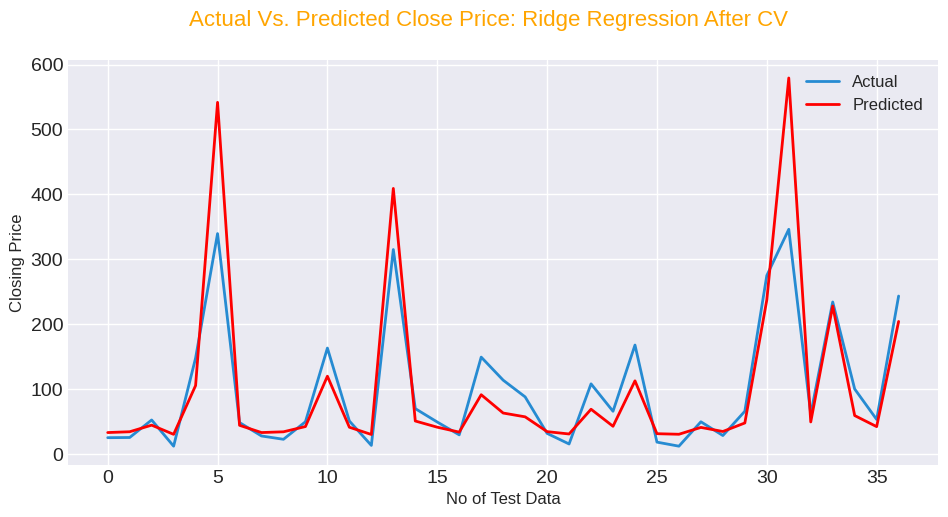

In [54]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv),color='red')
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16,color = 'Orange')
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.style.use("seaborn-paper")
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

> In order to choose the optimal parameter, I utilised gridsearchcv.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [55]:
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.033
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.817


> Rigid R2 score is 0.8225 but R2 is 0.817 after cross validation so there is no such improvement

### ML Model - **4. Elastic Net regression**

In [56]:
# ML Model - 4 Implementation
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)

# Fit the Algorithm
elastic_model = elastic.fit(x_train,y_train)

# Predict on the model
y_pred_elastic = elastic.predict(x_test)
y_pred_elastic

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [57]:
# score 
elastic.score(x_train,y_train)

0.7958095661377872

In [58]:
eltest_df = pd.DataFrame(y_test)
eltest_df['Predicted closing price In Elastic Net regression'] = y_pred_elastic

eltest_df.head()

,Close,Predicted closing price In Elastic Net regression
16,1.403464,1.560866
179,1.408240,1.574690
66,1.720903,1.671998
40,1.088490,1.527862
166,2.170115,1.999477


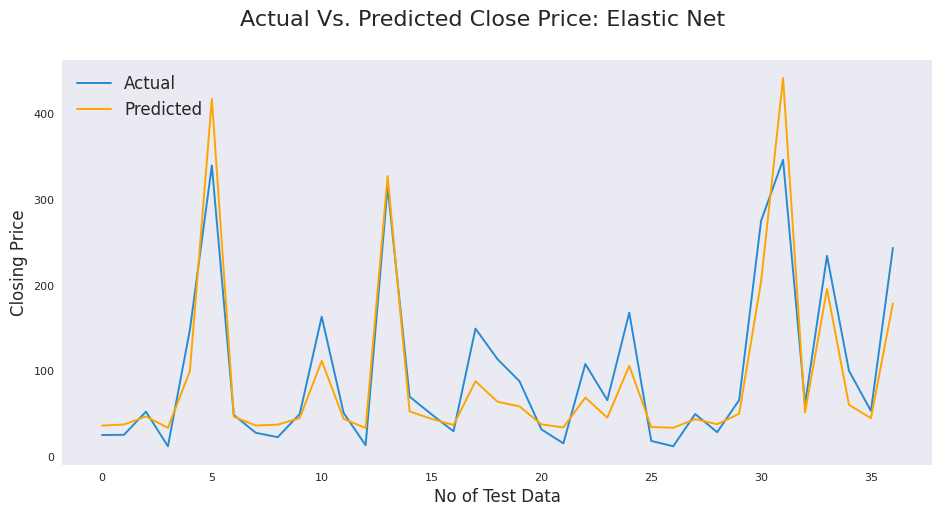

In [59]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic),color='orange')
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The third type of regularization method is elastic net regression. It was created as a result of the Lasso regression's limitation. Lasso regression can’t take correct alpha and lambda values as per requirement of data. It combines two popular penalties, specifically the L1 and L2 penalty.

In [60]:
# Test Performance 
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.036
RMSE : 0.191
MAE : 0.157
MAPE : 0.102
R2 : 0.796


### ML Model - **5. GradientBoostingRegression**

In [61]:
# ML Model - 5 Implementation
gb_regressor=GradientBoostingRegressor()

# Fit the Algorithm
gb_regressor.fit(x_train,y_train)

# Predict on the model
y_pred_test=gb_regressor.predict(x_test)
y_pred_test

array([1.3301413 , 1.46168106, 1.74664092, 1.15156691, 2.19844436,
       2.52204053, 1.66788414, 1.40806247, 1.46227658, 1.69947941,
       2.23625052, 1.67773018, 1.10365279, 2.49873956, 1.85612511,
       1.69789776, 1.43300701, 2.15213268, 1.99053053, 1.94751388,
       1.46227658, 1.19212026, 2.03588743, 1.71672643, 2.23044846,
       1.29221632, 1.15156691, 1.69789776, 1.48047402, 1.78335578,
       2.42450695, 2.53492185, 1.85374968, 2.36329136, 1.95460214,
       1.76059842, 2.36743318])

In [62]:
gtest_df = pd.DataFrame(y_test)
gtest_df['Predicted closing price In Elastic Net regression'] = y_pred_test

gtest_df.head()

,Close,Predicted closing price In Elastic Net regression
16,1.403464,1.330141
179,1.408240,1.461681
66,1.720903,1.746641
40,1.088490,1.151567
166,2.170115,2.198444


In [63]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

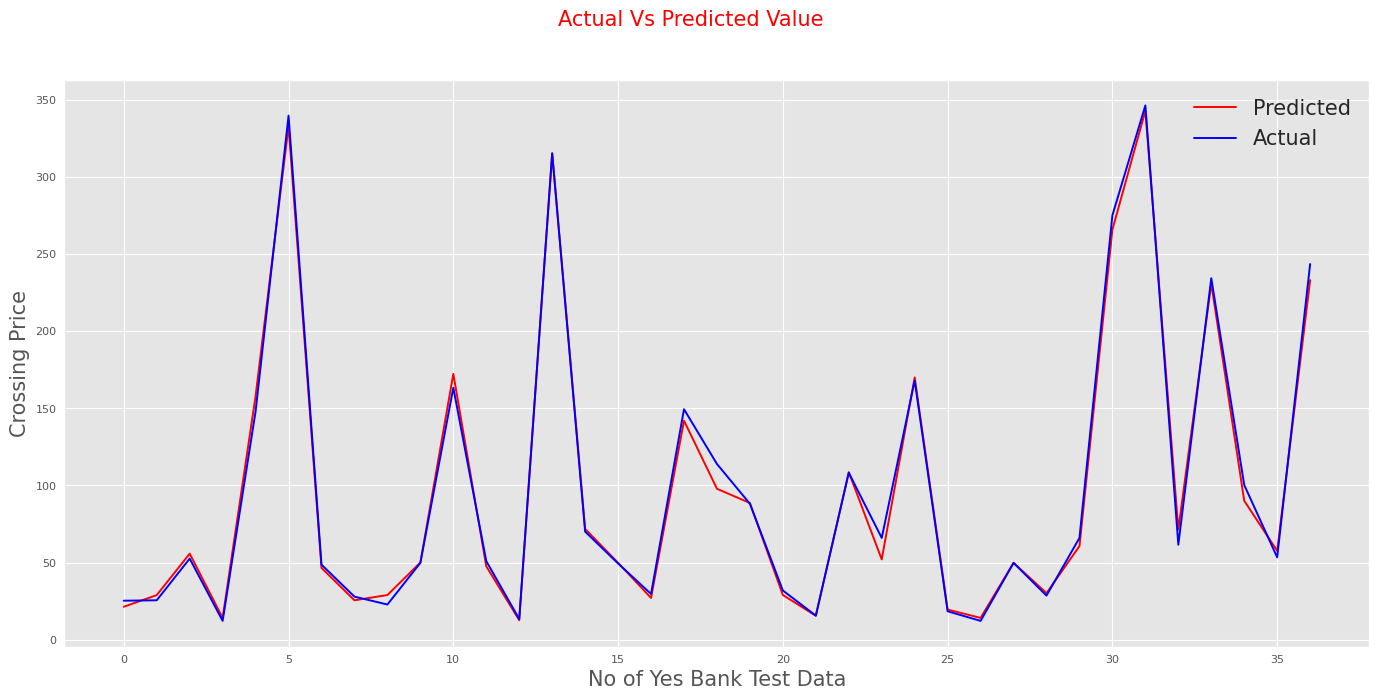

In [64]:
plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(10**((y_pred_test)),color='red')
plt.plot(10**(np.array(y_test)),color='blue')
plt.suptitle('Actual Vs Predicted Value ', fontsize= 15,color='red')
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Yes Bank Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> The difference between the present forecast and the known correct target value is calculated using gradient boosting regression. This variation is referred to as residual. After that, a weak model that maps features to that residual is trained using gradient boosting regression.

In [65]:
# Test Performance 
print("MSE :",round(mean_squared_error(y_test,y_pred_test), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test,y_pred_test)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_test),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test,y_pred_test),3))
print("R2 :",round(r2_score(y_test,y_pred_test),3))

MSE : 0.002
RMSE : 0.041
MAE : 0.031
MAPE : 0.02
R2 : 0.991


### ML Model - **6.XGBoost Regression**

In [66]:
# ML Model - 5 Implementation
xgb = XGBRegressor()

# Fit the Algorithm
xgb.fit(x_train,y_train)

# Predict on the model
xg_pred = xgb.predict(x_test)
xg_pred

array([1.3392187, 1.4758207, 1.748508 , 1.1662616, 2.1395898, 2.5142817,
       1.6815532, 1.4059161, 1.481916 , 1.7062517, 2.2304559, 1.6739156,
       1.0959644, 2.5049477, 1.8495944, 1.7007504, 1.435145 , 2.1372025,
       2.0201871, 1.9451874, 1.4812558, 1.1896846, 2.0359929, 1.7063808,
       2.2294648, 1.2862344, 1.1662616, 1.7025944, 1.4811883, 1.7835379,
       2.4367232, 2.53591  , 1.8465369, 2.3564181, 1.9621443, 1.7753245,
       2.3714423], dtype=float32)

In [67]:
# score
xgb.score(x_train , y_train)

0.9999793046487826

In [68]:
xgbtest_df = pd.DataFrame(y_test)
xgbtest_df['Predicted closing price In XGBoost'] = xg_pred

xgbtest_df.head()

,Close,Predicted closing price In XGBoost
16,1.403464,1.339219
179,1.408240,1.475821
66,1.720903,1.748508
40,1.088490,1.166262
166,2.170115,2.139590


In [69]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

Text(0.5, 0.98, 'Actual Vs Predicted Value in XG Boost')

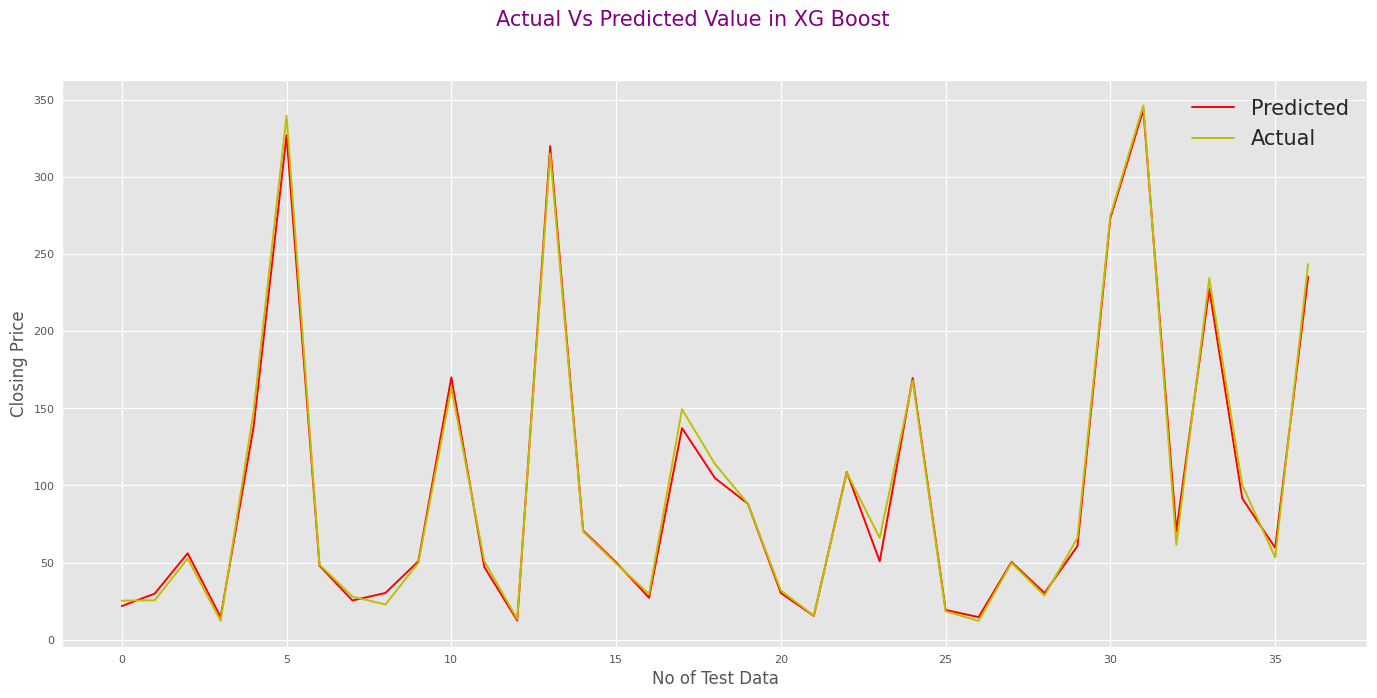

In [70]:
plt.figure(figsize=(15,7))
plt.plot(10**((xg_pred)),color='red')
plt.plot(10**(np.array(y_test)),color='y')
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.suptitle('Actual Vs Predicted Value in XG Boost', fontsize= 15,color='purple')

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> Each feature utilised for prediction is generally ranked in order of importance by the XGBoostRegressor. Gradient boosting has the advantage that retrieving relevance ratings for each attribute is not too difficult after the boosted trees have been built. The two key benefits of XGBoost are model performance and execution speed.

In [71]:
#Evaluation metric Score Chart.
# Test Performance
print("MSE score:", round(mean_squared_error (y_test,xg_pred), 3))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, xg_pred)), 3))
print("MAE score:", round(mean_absolute_error(y_test,xg_pred), 3))
print("MAPE score:", round(mean_absolute_percentage_error(y_test,xg_pred), 3))
print("R2 score:", round(r2_score(y_test,xg_pred), 3))

MSE score: 0.002
RMSE score: 0.043
MAE score: 0.031
MAPE score: 0.02
R2 score: 0.989


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

>  Because we wanted to come as near to the close price as possible, here R2 score has received the most weight in my analysis. R2 evaluates how well a model fits the data. The R2 coefficient of determination in regression is a statistical indicator of how closely the regression predictions match the actual data points. When the R2 value is 1, the regression's predictions accurately reflect the data. In other words, the closer the model is to 1, the better it can forecast our dependent variable. R2 is the ideal evaluation indicator to provide a positive business impact given our desired objective because it will assist us assess how well our models are doing.I found this using gridsearchcv the perfect parameter.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

All models' performance data is already available to me, and I'm currently building a function to test and record the performance of each model in a single dataframe.

In [72]:
#Define all models 
all_reg=[
    ['LinearRegression:',l_reg],
    ['Lasso Regression:',lso_r],
    ['Lasso Regression cv:',lasso_model_cv],
    ['Ridge Regression:',ridge_reg],
    ['Ridge Regression cv:',ridge_model_cv],
    ['ElasticNet:',elastic],
    ['GradientBoostingRegression:',gb_regressor],
    ['XGBoost Regression:',xgb]  
]

In [73]:
all_reg

[['LinearRegression:', LinearRegression()],
 ['Lasso Regression:', Lasso(alpha=0.005, max_iter=3000)],
 ['Lasso Regression cv:',
  GridSearchCV(cv=3, estimator=Lasso(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               return_train_score=True, scoring='neg_mean_squared_error')],
 ['Ridge Regression:', Ridge(alpha=0.01)],
 ['Ridge Regression cv:',
  GridSearchCV(cv=3, estimator=Ridge(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               scoring='neg_mean_squared_error')],
 ['ElasticNet:', ElasticNet(alpha=0.1)],
 ['GradientBoostingRegression:', GradientBoostingRegressor()],
 ['XGBoost Regression:',
  XGBRegressor(base_score=None, 

In [74]:
model_data=[]
for name,current_model in all_reg:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(x_train,y_train)
    curr_model_data['MSE']=round(mean_squared_error(y_test,current_model.predict (x_test)),3)
    curr_model_data['RMSE']=round(np.sqrt(mean_squared_error(y_test, current_model.predict(x_test))),3)
    curr_model_data['MAE']=round(mean_absolute_error(y_test,current_model.predict(x_test)),3)
    curr_model_data['MAPE']=round(mean_absolute_percentage_error(y_test,current_model.predict(x_test)),3)
    curr_model_data['R2_score']=round(r2_score(y_test,current_model.predict (x_test)),3)
    model_data.append(curr_model_data)

In [75]:
# create dataframe 
df_table=pd.DataFrame(model_data)
df_table

,Name,MSE,RMSE,MAE,MAPE,R2_score
0,LinearRegression:,0.032,0.178,0.151,0.095,0.823
1,Lasso Regression:,0.032,0.179,0.152,0.096,0.820
2,Lasso Regression cv:,0.032,0.180,0.153,0.097,0.819
3,Ridge Regression:,0.032,0.178,0.151,0.095,0.823
4,Ridge Regression cv:,0.033,0.180,0.153,0.097,0.817
5,ElasticNet:,0.036,0.191,0.157,0.102,0.796
6,GradientBoostingRegression:,0.002,0.041,0.030,0.020,0.991
7,XGBoost Regression:,0.002,0.043,0.031,0.020,0.989


> I've decided to use GradientBoosting Regression as my last prediction model. Although the other models also did well, the majority of them had a R square score of between 70% to 80%. The R-square score for We got 99% highest accuracy for GradientBoosting Regression. If we look attentively at the graph, we can see that GradientBoosting accurately captures the data trend, even when it goes around the corners. The other models weren't able to recognise the corner trend, which reduced their score. My second preference will be for XGBoost Regression reasons are the same above but we got second higest 98% accuracy.
>
>For predicting continuous numeric values, XGBoost regression and Gradient Boosting regression are both effective machine learning models.
If you need great accuracy and speed with a large and complicated dataset, XGBoost regression can be a better option. Since my dataset is relatively small has only has 185 rows and 5 columns, gradient boosting regression is a better option since it can provide a simpler and more interpretable model

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

> Gradient Boosting regression is a simpler,easy to understood and more  easily interpretable model which uses the same sequential forming approach to decision trees.Gradient boosting is a supervised learning algorithm that attempts to precisely predict a target variable by combining estimates from a set of simpler and weaker models.
>
>One of the ensemble technique variations that uses numerous weak models combined for greater overall performance is known as gradient boosting.One of the most recognised machine learning techniques for tabular datasets is gradient boosting. It has excellent usability, can deal with missing values, outliers, and large cardinality categorical values on your features, and is strong enough to detect any nonlinear relationship between your model target and features.


# **Conclusion**

* Beginning from Exploratory Data Analysis we see the sudden change in stock price from 2014.
* Bank share price is at the highest in 2018-19.After there is a Sudden fall in price of stock .
* After that stock price start to increase again but price fall again.
* From the scatter plot we can see High,open,low price of share are directly correlate with the closing price of share.
* we applied following regression model on data set and result are evaluted and compared


1.  LinearRegression
2.	Lasso Regression
3.	Ridge Regression
4.	GradientBoostingRegressor
5.	ElasticNetCV
6.	XGBRegressor



*  we check test performance such as mean absoulte error, mean squared error, root mean squared error, r2 
* We got 99% highest accuracy for GradientBoosting Regression and 98% for XGB Regressor
* we got almost simillar result for LinearRegression,Lasso Regression and Ridge Regression
* Cross Validation has been applied on various algorithms. However, the outcome is nearly identical.
* Using data on the closing price of Yes Bank's shares, GradientBoostingRegressor and Xgboost regression is the best model to apply.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***